# PyTorch
## Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters. <br>
Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!
### Initializing a Tensor
Starting with loading the libraries

In [2]:
import torch
import numpy as np

Tensors can be initialized in various ways:
- Initializing a Tensor directly from the data

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


- Initializing a Tensor from a NumPy array

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array) #Keep in mind Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


- Initializing a Tensor from another tensor

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data (Keeping the shape and datatype)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data (still keeping the shape tho)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6898, 0.6795],
        [0.5945, 0.4062]]) 



- Initializing a Tensor with random or constant values:

In [6]:
shape = (2,3) #This describes the dimensionality of the output tensor and it consist of (the number of rows, the number of colomns).

#Creating Tensors based on the predefined shape
rand_tensor = torch.rand(shape) 
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8898, 0.0829, 0.4414],
        [0.6315, 0.0610, 0.0510]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a Tensor:
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [7]:
tensor = torch.rand(3,4)

print(f"Random Tensor: \n {tensor}")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor = tensor.to("cuda") # moving the tensor to GPU
print(f"Device tensor is stored on: {tensor.device}") 

Random Tensor: 
 tensor([[0.9972, 0.1266, 0.6029, 0.0565],
        [0.2707, 0.2494, 0.9691, 0.2598],
        [0.2900, 0.2890, 0.1241, 0.2399]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


### Operations on Tensors
There are over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling... etc. <br>
Keep in mind, that tensors are created on CPU by default, and even though you can move them to a cuda device (GPU) as shown in the example above, moving large tensors can be really expensive.

- Standard numpy-like indexing and slicing:

In [8]:
tensor = torch.ones(4, 4)

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

tensor[:,1] = 0 #Replacing every 2nd element from every vector (array) into a 0

print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- **Joining tensors** You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


- Arithmetic operations

In [10]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3) #This saves the output in y3 so it won't be random anymore


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3) #This saves the output in z3 so it won't be random anymore

# Since all of them pretty much doing the same thing i'll just print one tensor of each
print(f"Matrix multiplication:\n {y1} \n")
print(f"Element-wise multiplication:\n {z1}")

Matrix multiplication:
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

Element-wise multiplication:
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- **Single-element tensors** If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [11]:
agg = tensor.sum()
agg_item = agg.item()

print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


- **In-place operations Operations** store the result into the operand are called in-place. They are denoted by a `_` suffix. For example: `x.copy_(y)`, `x.t_()`, will change x.

In [12]:
print(f"{tensor} \n")
tensor.add_(5) #This would overwrite the tensor itself storing the result.
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Datasets & Dataloaders
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use preloaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and Dataloader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of preloaded datasets (such as Fashion-MNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: Image Datasets, Text Datasets, and Audio Datasets

### Loading a Dataset
Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

In [17]:
#importing the libs
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#Loading the data
training_data = datasets.FashionMNIST(
    root="data", #Path to the data
    train=True, #Are the data for training
    download=True, #Download the data if they don't exist
    transform=ToTensor() #Transform the feature and label into tensors
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(f"A sample of our data consists of {len(test_data[0])} parts, the first part being the image itself as a tensor \
is of the following shape '{test_data[0][0].shape}', while the oher part is an integer refering to the label.")

A sample of our data consists of 2 parts, the first part being the image itself as a tensor is of the following shape 'torch.Size([1, 28, 28])', while the oher part is an integer refering to the label.


Now an example about how to build a custom Dataset class that creates the dataset from a data path, using the folders as a label

In [59]:
import os
from turtle import color, colormode
import pandas as pd
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms as t

class CustomImageDataset(Dataset):
    """A custom Dataset class"""
    def __init__(self,data_path, transform = None, target_transform=None):
        """The __init__ function is run once when instantiating the Dataset object."""
        self.path = data_path
        self.transform = transform
        self.target_transform = target_transform

        list_of_elem = []

        for root, dirs, files in os.walk(self.path):
            for file in files:
                list_of_elem.append([root + "/" + file, root.split("/")[-1]])

        self.img_labels = pd.DataFrame(list_of_elem, columns=["Img_Path", "Label"])

    def __len__(self):
        """returns the number of samples in our dataset."""
        return len(self.img_labels)

    def __getitem__(self, idx):
        """The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple."""
        image = read_image(self.img_labels.iloc[idx, 0],mode = ImageReadMode.GRAY) #To load a gray scale image
        #print(self.img_labels.iloc[idx, 0])
        label = int(self.img_labels.iloc[idx, 1])
        #print(self.img_labels.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


custom_dataset = CustomImageDataset(data_path="data/Fashion(selfbuilt)/",transform = t.Resize((28,28)))
x = custom_dataset.__getitem__(6)[0]
y = custom_dataset.__getitem__(6)[1]

print(f"x is the tensor of the 7th image with the shape {x.shape} and has {y} as its label")

x is the tensor of the 7th image with the shape torch.Size([1, 28, 28]) and has 1 as its label


### Iterating and Visualizing the Dataset


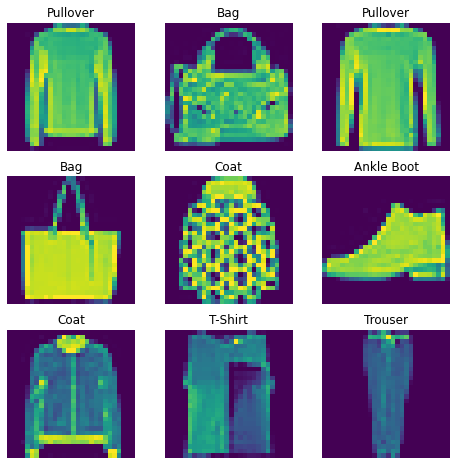

In [60]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    #print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

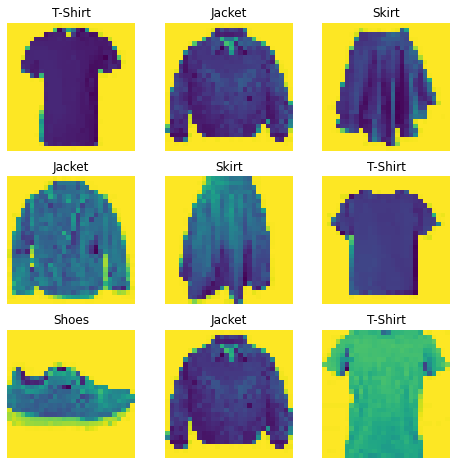

In [61]:
labels_map = {
    0: "T-Shirt",
    1: "Skirt",
    2: "Shoes",
    3: "Jacket"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(custom_dataset), size=(1,)).item()
    img, label = custom_dataset[sample_idx]
    #print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

### Preparing the data for training with DataLoaders
The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.


In [69]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
custom_dataset_dataloader = DataLoader(custom_dataset, batch_size=4, shuffle = True) #Since the amount of data is really small (just 16 elem) creating 4 batches is enough
print(len(custom_dataset_dataloader))

4


### Iterate through the DataLoader
We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


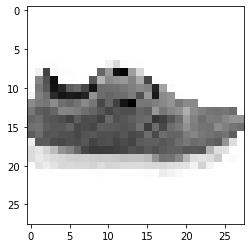

Label: 2


In [70]:
train_features, train_labels = next(iter(custom_dataset_dataloader)) #Checking to see if our custom dataset was working just like the others
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")